<a href="https://colab.research.google.com/github/marcelinomaged25/JavaProject/blob/main/Human_Bone_Fractures_Multi_modal_Image_Dataset_(HBFMID).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import L2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!/bin/bash
!kaggle datasets download jockeroika/human-bone-fractures-image-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/jockeroika/human-bone-fractures-image-dataset
License(s): CC0-1.0
human-bone-fractures-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d jockeroika/human-bone-fractures-image-dataset --force


Dataset URL: https://www.kaggle.com/datasets/jockeroika/human-bone-fractures-image-dataset
License(s): CC0-1.0
  0% 0.00/38.1M [00:00<?, ?B/s]
100% 38.1M/38.1M [00:00<00:00, 437MB/s]


In [ ]:
!unzip -q human-bone-fractures-image-dataset.zip -d human_bone_data

In [ ]:
!ls /content/human_bone_data/

'Human Bone Fractures Multi-modal Image Dataset (HBFMID)'


In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/'

'Bone Fractures Detection'


In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train'

images	labels


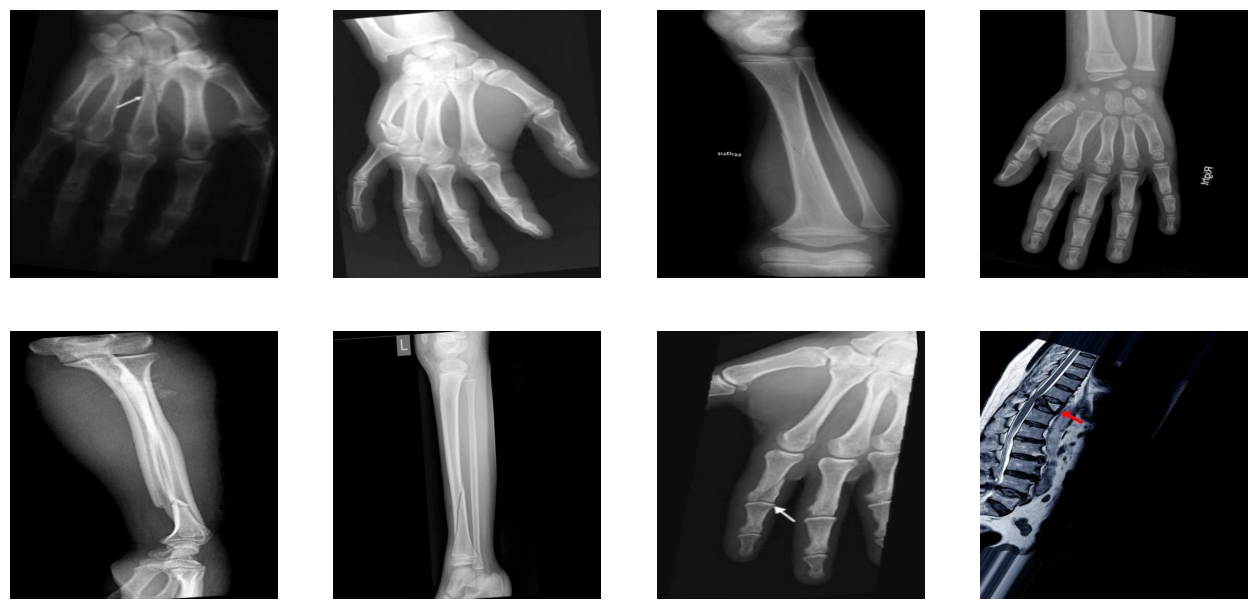

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
train_path='/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images'
val_path='/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/val/images'
test_path='/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images'
plt.figure(figsize=(16,16))

images = os.listdir(train_path)
# Filter out directories
image_files = [f for f in images if os.path.isfile(os.path.join(train_path, f))]

for i in range(8):
    img = random.choice(image_files)
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(train_path, img))
    fig.imshow(img)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


train_dir = train_path
test_dir = test_path
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150), batch_size=32,class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/'

data.yaml  README.roboflow.txt	test  train  valid


In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/'

images	labels


In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images'

101_jpg.rf.275531ad788db79438f0f14a4cf4cd9e.jpg
101_jpg.rf.2a0fe354c5d55cf1c9af2fb1c752195c.jpg
101_jpg.rf.32c5675b216fa6fb708a92214b889f8b.jpg
101_jpg.rf.3a192f36de75898b4a0cbe340952ef66.jpg
101_jpg.rf.5cbd554dd4c62bdfd5a48178dc8cd22a.jpg
101_jpg.rf.65084971a80deb6be3915e43f22ad00d.jpg
101_jpg.rf.77b120b616788b8e91dc6db21649b4bc.jpg
101_jpg.rf.9ba366195ec7b63b1bc98e147ab2da8f.jpg
101_jpg.rf.b73663e3a94232f9cd907f596d946c69.jpg
101_jpg.rf.c7b8c2dd53c0ae76e389a91599b7a900.jpg
101_jpg.rf.d6635ba563d2cd2ecc832ad0c7204908.jpg
101_jpg.rf.f906521c3ff89815b55a1bbd768747a9.jpg
102_jpg.rf.10ad0bcfa1b7226ba1a891ab37c836b6.jpg
102_jpg.rf.5fe81e2c1c889f302ec626b81bad62ec.jpg
102_jpg.rf.7020bd3bd0fa0e01ff7a5875c460d01c.jpg
102_jpg.rf.70d5b597b7390bf78ec1873eefeb771c.jpg
102_jpg.rf.a6762324820cdb458f89ab89ae552b5a.jpg
102_jpg.rf.eb04297826c0635e89c75f5b2503d7d0.jpg
103_jpg.rf.140d24a317968b96cf129c3059cce353.jpg
103_jpg.rf.23bd15755a93c7e775780ff43ca6ef3a.jpg
103_jpg.rf.5f3d01322b7a07584cbccd22ba904

# Task
Fix the error in the selected code by organizing the images into class subdirectories and updating the data generators to load images from these subdirectories.

## Inspect labels

### Subtask:
Examine the format of the label files to understand how class information is stored.


**Reasoning**:
List the contents of the labels directory to understand the file structure and identify example label files for inspection.



In [ ]:
train_labels_path = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels'
!ls {train_labels_path}

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls /content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels'


**Reasoning**:
The previous command failed due to special characters in the path. Quote the path to handle spaces and parentheses correctly and list the contents of the labels directory again.



In [ ]:
train_labels_path = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels'
!ls "{train_labels_path}"

101_jpg.rf.275531ad788db79438f0f14a4cf4cd9e.txt
101_jpg.rf.2a0fe354c5d55cf1c9af2fb1c752195c.txt
101_jpg.rf.32c5675b216fa6fb708a92214b889f8b.txt
101_jpg.rf.3a192f36de75898b4a0cbe340952ef66.txt
101_jpg.rf.5cbd554dd4c62bdfd5a48178dc8cd22a.txt
101_jpg.rf.65084971a80deb6be3915e43f22ad00d.txt
101_jpg.rf.77b120b616788b8e91dc6db21649b4bc.txt
101_jpg.rf.9ba366195ec7b63b1bc98e147ab2da8f.txt
101_jpg.rf.b73663e3a94232f9cd907f596d946c69.txt
101_jpg.rf.c7b8c2dd53c0ae76e389a91599b7a900.txt
101_jpg.rf.d6635ba563d2cd2ecc832ad0c7204908.txt
101_jpg.rf.f906521c3ff89815b55a1bbd768747a9.txt
102_jpg.rf.10ad0bcfa1b7226ba1a891ab37c836b6.txt
102_jpg.rf.5fe81e2c1c889f302ec626b81bad62ec.txt
102_jpg.rf.7020bd3bd0fa0e01ff7a5875c460d01c.txt
102_jpg.rf.70d5b597b7390bf78ec1873eefeb771c.txt
102_jpg.rf.a6762324820cdb458f89ab89ae552b5a.txt
102_jpg.rf.eb04297826c0635e89c75f5b2503d7d0.txt
103_jpg.rf.140d24a317968b96cf129c3059cce353.txt
103_jpg.rf.23bd15755a93c7e775780ff43ca6ef3a.txt
103_jpg.rf.5f3d01322b7a07584cbccd22ba904

**Reasoning**:
The listing shows that the label files are in `.txt` format. I need to read the content of one of these files to understand how the class information is stored.



In [ ]:
label_file_path = os.path.join(train_labels_path, '101_jpg.rf.275531ad788db79438f0f14a4cf4cd9e.txt')
with open(label_file_path, 'r') as f:
    label_content = f.read()
print(label_content)

8 0.865625 0.63125 0.1171875 0.11796875


**Reasoning**:
The label file contains a single line with numbers. Based on the context of image datasets with associated text files, this format likely follows the YOLO format, where the first number is the class ID and the subsequent numbers represent bounding box coordinates. I need to check the `data.yaml` file to confirm the class mapping.



In [ ]:
data_yaml_path = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml'
with open(data_yaml_path, 'r') as f:
    data_yaml_content = f.read()
print(data_yaml_content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 10
names: ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced', 'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

roboflow:
  workspace: iubat-i4ldm
  project: bon-fracture-detection
  version: 2
  license: Private
  url: https://app.roboflow.com/iubat-i4ldm/bon-fracture-detection/2


## Create class subdirectories

### Subtask:
Create 'fractured' and 'unfractured' subdirectories within the `train/images`, `val/images`, and `test/images` directories.


**Reasoning**:
Define the base path and create the fractured and unfractured subdirectories within the train, validation, and test image directories as instructed.



In [ ]:
base_path = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/'
train_images_path = os.path.join(base_path, 'train', 'images')
val_images_path = os.path.join(base_path, 'valid', 'images')
test_images_path = os.path.join(base_path, 'test', 'images')

os.makedirs(os.path.join(train_images_path, 'fractured'), exist_ok=True)
os.makedirs(os.path.join(train_images_path, 'unfractured'), exist_ok=True)

os.makedirs(os.path.join(val_images_path, 'fractured'), exist_ok=True)
os.makedirs(os.path.join(val_images_path, 'unfractured'), exist_ok=True)

os.makedirs(os.path.join(test_images_path, 'fractured'), exist_ok=True)
os.makedirs(os.path.join(test_images_path, 'unfractured'), exist_ok=True)

**Reasoning**:
Verify that the new subdirectories were created successfully.



In [ ]:
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images'
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images'
!ls '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images'

101_jpg.rf.275531ad788db79438f0f14a4cf4cd9e.jpg
101_jpg.rf.2a0fe354c5d55cf1c9af2fb1c752195c.jpg
101_jpg.rf.32c5675b216fa6fb708a92214b889f8b.jpg
101_jpg.rf.3a192f36de75898b4a0cbe340952ef66.jpg
101_jpg.rf.5cbd554dd4c62bdfd5a48178dc8cd22a.jpg
101_jpg.rf.65084971a80deb6be3915e43f22ad00d.jpg
101_jpg.rf.77b120b616788b8e91dc6db21649b4bc.jpg
101_jpg.rf.9ba366195ec7b63b1bc98e147ab2da8f.jpg
101_jpg.rf.b73663e3a94232f9cd907f596d946c69.jpg
101_jpg.rf.c7b8c2dd53c0ae76e389a91599b7a900.jpg
101_jpg.rf.d6635ba563d2cd2ecc832ad0c7204908.jpg
101_jpg.rf.f906521c3ff89815b55a1bbd768747a9.jpg
102_jpg.rf.10ad0bcfa1b7226ba1a891ab37c836b6.jpg
102_jpg.rf.5fe81e2c1c889f302ec626b81bad62ec.jpg
102_jpg.rf.7020bd3bd0fa0e01ff7a5875c460d01c.jpg
102_jpg.rf.70d5b597b7390bf78ec1873eefeb771c.jpg
102_jpg.rf.a6762324820cdb458f89ab89ae552b5a.jpg
102_jpg.rf.eb04297826c0635e89c75f5b2503d7d0.jpg
103_jpg.rf.140d24a317968b96cf129c3059cce353.jpg
103_jpg.rf.23bd15755a93c7e775780ff43ca6ef3a.jpg
103_jpg.rf.5f3d01322b7a07584cbccd22ba904

## Move images to class subdirectories

### Subtask:
Read the label files and move each image to its corresponding class subdirectory based on the label.


**Reasoning**:
Read the label files and move each image to its corresponding class subdirectory based on the label.



In [ ]:
base_path = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/'
train_images_path = os.path.join(base_path, 'train', 'images')
train_labels_path = os.path.join(base_path, 'train', 'labels')
val_images_path = os.path.join(base_path, 'valid', 'images')
val_labels_path = os.path.join(base_path, 'valid', 'labels')
test_images_path = os.path.join(base_path, 'test', 'images')
test_labels_path = os.path.join(base_path, 'test', 'labels')

def move_images_based_on_labels(images_path, labels_path):
    """
    Moves image files into 'fractured' or 'unfractured' subdirectories
    based on the content of their corresponding label files.
    """
    image_files = [f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))]

    for image_file in image_files:
        image_name, image_ext = os.path.splitext(image_file)
        label_file_name = image_name + '.txt'
        label_file_path = os.path.join(labels_path, label_file_name)
        image_file_path = os.path.join(images_path, image_file)

        is_fractured = False
        if os.path.exists(label_file_path) and os.path.getsize(label_file_path) > 0:
            with open(label_file_path, 'r') as f:
                for line in f:
                    if line.strip() and not line.strip().startswith('2 '):
                        is_fractured = True
                        break

        if is_fractured:
            shutil.move(image_file_path, os.path.join(images_path, 'fractured', image_file))
        else:
            shutil.move(image_file_path, os.path.join(images_path, 'unfractured', image_file))

move_images_based_on_labels(train_images_path, train_labels_path)
move_images_based_on_labels(val_images_path, val_labels_path)
move_images_based_on_labels(test_images_path, test_labels_path)


**Reasoning**:
Verify that the images have been moved correctly by listing the contents of the 'fractured' and 'unfractured' subdirectories in each of the train, validation, and test image directories.



In [ ]:
print("Train Images:")
!ls '{train_images_path}/fractured' | head
!ls '{train_images_path}/unfractured' | head

print("\nValidation Images:")
!ls '{val_images_path}/fractured' | head
!ls '{val_images_path}/unfractured' | head

print("\nTest Images:")
!ls '{test_images_path}/fractured' | head
!ls '{test_images_path}/unfractured' | head

Train Images:
101_jpg.rf.275531ad788db79438f0f14a4cf4cd9e.jpg
101_jpg.rf.2a0fe354c5d55cf1c9af2fb1c752195c.jpg
101_jpg.rf.32c5675b216fa6fb708a92214b889f8b.jpg
101_jpg.rf.3a192f36de75898b4a0cbe340952ef66.jpg
101_jpg.rf.5cbd554dd4c62bdfd5a48178dc8cd22a.jpg
101_jpg.rf.65084971a80deb6be3915e43f22ad00d.jpg
101_jpg.rf.77b120b616788b8e91dc6db21649b4bc.jpg
101_jpg.rf.9ba366195ec7b63b1bc98e147ab2da8f.jpg
101_jpg.rf.b73663e3a94232f9cd907f596d946c69.jpg
101_jpg.rf.c7b8c2dd53c0ae76e389a91599b7a900.jpg
109_jpg.rf.057bbed36a56a271b9f6edb4caea3df6.jpg
109_jpg.rf.3880b7a7846bfc5ad2eb808e540de176.jpg
109_jpg.rf.69e8d931d08289d2817db876ede62618.jpg
109_jpg.rf.91ad8700f27493a85917bf6e0d417b54.jpg
109_jpg.rf.e2a7596c004adcb7bce4eef0bcbb15cf.jpg
109_jpg.rf.f63fe8d67c23188ee374946f3a0583d4.jpg
114_jpg.rf.8fb68ebceb36b9a54b444df085eee45b.jpg
114_jpg.rf.9cc2885ecffd2ec5163828c485f30956.jpg
114_jpg.rf.d9ca08ff087f9fd2f14d8c1403e16f19.jpg
11_jpg.rf.102b34f02f32782e2bdb650f259560a5.jpg

Validation Images:
102_jpg

## Update data generators

### Subtask:
Modify the `flow_from_directory` calls in cell `UsKNYDxtehHM` to point to the main `train/images`, `val/images`, and `test/images` directories (which will now contain the class subdirectories) and ensure `class_mode='binary'` is used.


**Reasoning**:
Modify the ImageDataGenerator calls to point to the correct directories and include the validation generator.



**Reasoning**:
The error indicates that the path for the validation directory is incorrect. Checking the previous `ls` command outputs, the validation directory is named 'valid' not 'val'. Correct the `val_path` variable to point to the correct directory.



In [ ]:
train_dir = train_path
val_dir = '/content/human_bone_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images'
test_dir = test_path

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1347 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


## Verify data generators

### Subtask:
Run the cell with the data generators again to confirm that images are found and classified correctly.


**Reasoning**:
Execute the cell containing the updated data generators to confirm that they correctly load images and recognize the two classes.



In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1347 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


## Summary:

### Data Analysis Key Findings

*   Label files are in `.txt` format and follow the YOLO object detection format, with the first number on each line representing the class ID.
*   According to the `data.yaml` file, class ID 2 corresponds to 'Healthy', while other class IDs represent various types of fractures.
*   Images were successfully moved into 'fractured' or 'unfractured' subdirectories based on whether their corresponding label files contained annotations with class IDs other than '2'.
*   The `flow_from_directory` calls were updated to point to the correct directories (`train/images`, `valid/images`, and `test/images`) and `class_mode` was set to `'binary'` for all generators.
*   The data generators successfully found and classified the images into 2 classes (fractured and unfractured) for the training, validation, and test sets.

### Insights or Next Steps

*   The data is now correctly organized into class subdirectories, allowing for binary classification using `flow_from_directory`.
*   Proceed with defining and training a deep learning model using the updated data generators for the binary classification task.


In [ ]:

model = Sequential([    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                        MaxPooling2D(2, 2),
                        Conv2D(64, (3,3), activation='relu'),
                        MaxPooling2D(2,2),
                        Conv2D(128, (3,3), activation='relu'),
                        MaxPooling2D(2,2),

                        Flatten(),
                        BatchNormalization(),
                        Dense(512, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(1, activation='sigmoid')  ])


model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36992)          │       147,968 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,247,425 (73.42 MB)

 Trainable params: 19,173,441 (73.14 MB)

 Non-trainable params: 73,984 (289.00 KB)

In [ ]:
history=model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9211 - loss: 0.4159 - val_accuracy: 0.9453 - val_loss: 0.5491
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9861 - loss: 0.0505 - val_accuracy: 0.9609 - val_loss: 0.4533
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9976 - loss: 0.0194 - val_accuracy: 0.9609 - val_loss: 0.3457
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9992 - loss: 0.0065 - val_accuracy: 0.9609 - val_loss: 0.2482
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9688 - val_loss: 0.2111
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9967 - loss: 0.0060 - val_accuracy: 0.9609 - val_loss: 0.1351
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9997 - loss: 0.0039 - val_accuracy: 0.9609 - val_loss: 0.1206
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9531 -

<Axes: >

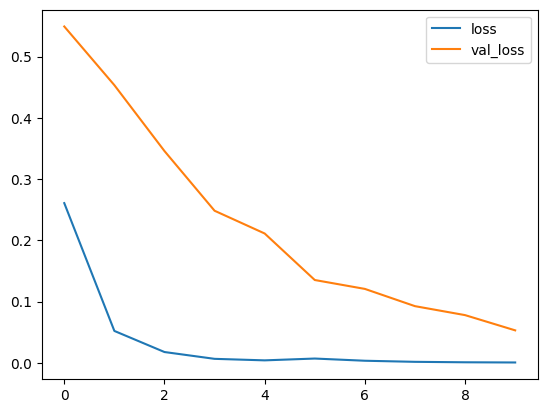

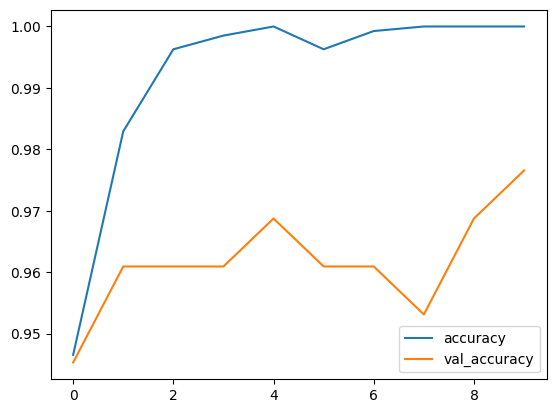

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9688 - loss: 0.0655


[0.06366275250911713, 0.96875]